In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
import PIL
import PIL.Image

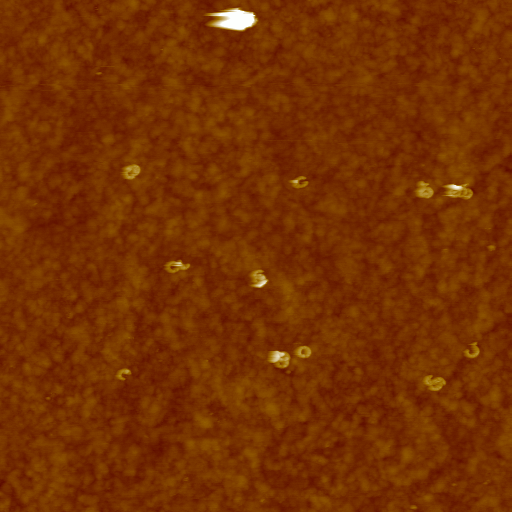

In [2]:
image = PIL.Image.open('example1.tif')
image

In [3]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor,dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [4]:
def image_to_tensor(image):
    return tf.keras.preprocessing.image.img_to_array(image, data_format=None, dtype=None)

In [5]:
tensor = image_to_tensor(image)

In [9]:
np.array(tensor).shape

(512, 512, 3)

In [10]:
image = PIL.Image.open('example1.tif').convert("L")

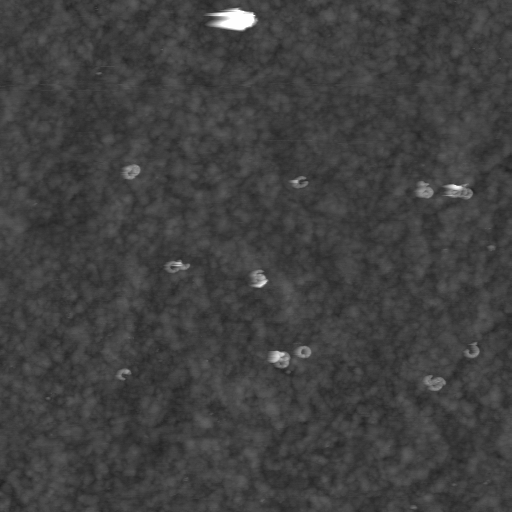

In [11]:
image

In [14]:
arr = np.asarray(image)
arr.shape

(512, 512)

In [19]:
tensor = image_to_tensor(image)

In [20]:
tensor.shape

(512, 512, 1)

In [34]:
np.min(tensor)

33.0

In [35]:
np.max(tensor)

254.0

In [33]:
norm = tensor/np.max(tensor)

In [37]:
np.min(norm)

0.12992126

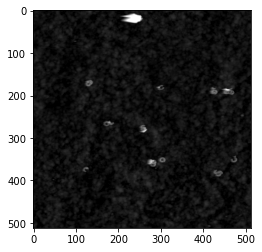

In [45]:
plt.imshow(norm, cmap='gray', vmin=0.2, vmax=1)

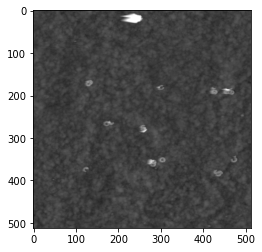

In [44]:
plt.imshow(norm, cmap='gray', vmin=0., vmax=1)

In [94]:
def de_noise(path,method='log',plot=True):
    image = PIL.Image.open(path).convert("L")
    tensor = image_to_tensor(image)
    data = tensor/np.max(tensor)
    out = methods(data,method)
    norm = out/np.max(out)
    if plot == True:
        fig,axes = plt.subplots(1,2,figsize=(10,5))
        axes[0].imshow(norm, cmap='gray', vmin=0.48, vmax=1)
        axes[1].imshow(norm, cmap='gray', vmin=0., vmax=1)
        plt.show()
    return norm

[0.2874016  0.27165353 0.27165353 ... 0.2519685  0.25984251 0.27165353]
(array([  3346, 113563, 132083,  10089,    638,    641,    555,    287,
          136,     88,     75,     77,     56,     51,    459]), array([0.12992126, 0.1879265 , 0.24593176, 0.30393702, 0.36194226,
       0.4199475 , 0.47795275, 0.535958  , 0.59396327, 0.6519685 ,
       0.70997375, 0.767979  , 0.82598424, 0.8839895 , 0.9419947 ,
       1.        ], dtype=float32))


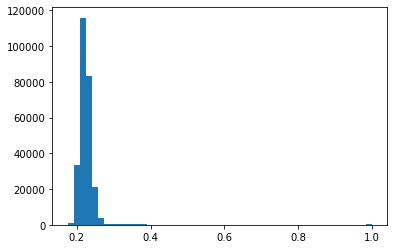

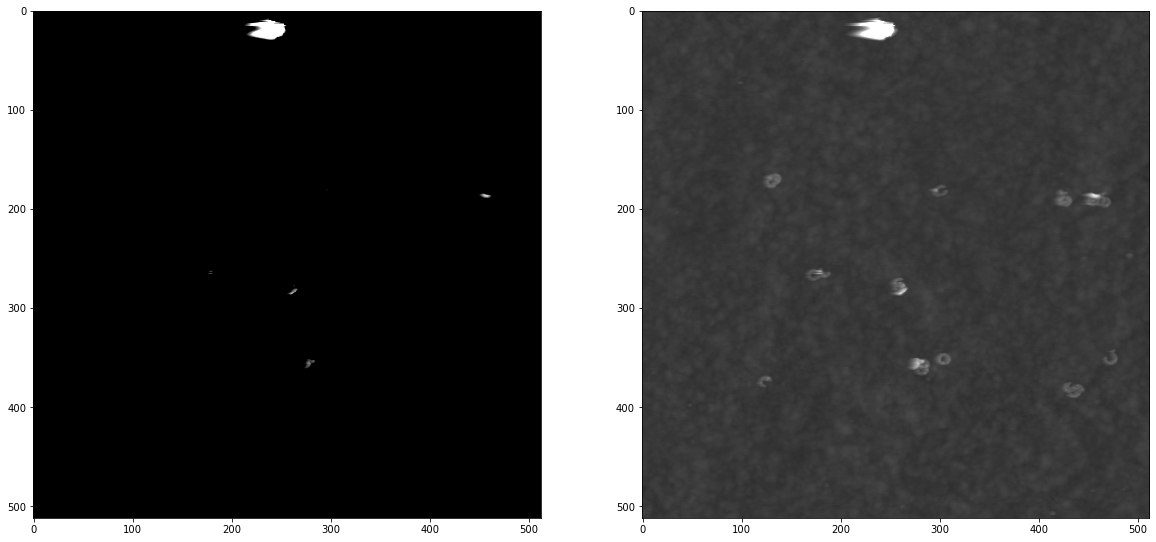

array([[[0.24046114],
        [0.23300557],
        [0.23300557],
        ...,
        [0.23484752],
        [0.23484752],
        [0.23484752]],

       [[0.2311781 ],
        [0.2311781 ],
        [0.2311781 ],
        ...,
        [0.23857518],
        [0.23484752],
        [0.23670399]],

       [[0.22578119],
        [0.22578119],
        [0.22578119],
        ...,
        [0.23300557],
        [0.23300557],
        [0.22936495]],

       ...,

       [[0.24236202],
        [0.24815525],
        [0.24815525],
        ...,
        [0.22225344],
        [0.22936495],
        [0.22936495]],

       [[0.23484752],
        [0.23857518],
        [0.2311781 ],
        ...,
        [0.22225344],
        [0.23300557],
        [0.23300557]],

       [[0.22051027],
        [0.22401036],
        [0.22401036],
        ...,
        [0.22401036],
        [0.22756599],
        [0.23300557]]], dtype=float32)

In [137]:
de_noise('example1.tif',method='exp')

In [170]:
def methods(data,name='log'):
    data = np.array(data)
    if name == 'log':
        return np.log(data)
    if name == 'exp':
        return np.exp(1*data)
    if name == 'linear':
        return data
    if name == 'square':
        return data**2
    if name == 'hyperbolic':
        return 1/data

In [195]:
def de_noise(path,method='log',plot=True,vmin=0.5):
    image = PIL.Image.open(path).convert("L")
    tensor = image_to_tensor(image)
    data = tensor/np.max(tensor)
    hist = np.histogram(data.flatten(),bins=15)
    print(data.flatten())
    print(hist)
    out = methods(data,method)
    norm = out/np.max(out)
    if plot == True:
        fig,axes = plt.subplots(2,2,figsize=(20,10))
        axes[0][0].imshow(norm, cmap='gray', vmin=0, vmax=vmin)
        axes[0][1].imshow(data, cmap='gray', vmin=0., vmax=1)
        axes[1][1].hist(norm.flatten(),bins=100,log=False)
        plt.show()
    return norm

In [197]:
de_noise('hirs_7cell_20190912_1_007.tif',method='hyperbolic',vmin=0.25)

[0.2874016  0.3031496  0.2952756  ... 0.23622048 0.21653543 0.21653543]
(array([    82,  25811, 184902,  50133,    485,    204,    194,     99,
           31,     24,     20,     12,     17,     11,    119]), array([0.09448819, 0.15485564, 0.2152231 , 0.27559054, 0.335958  ,
       0.39632547, 0.4566929 , 0.51706034, 0.5774278 , 0.63779527,
       0.69816273, 0.7585302 , 0.81889766, 0.87926507, 0.93963253,
       1.        ], dtype=float32))


array([[[0.32876712],
        [0.31168833],
        [0.32      ],
        ...,
        [0.47058827],
        [0.42105266],
        [0.42105266]],

       [[0.31578946],
        [0.3076923 ],
        [0.31578946],
        ...,
        [0.39999998],
        [0.38709676],
        [0.38709676]],

       [[0.31578946],
        [0.31578946],
        [0.31578946],
        ...,
        [0.39999998],
        [0.39999998],
        [0.41379315]],

       ...,

       [[0.43636364],
        [0.43636364],
        [0.4528302 ],
        ...,
        [0.375     ],
        [0.3809524 ],
        [0.3809524 ]],

       [[0.4615385 ],
        [0.4615385 ],
        [0.48000002],
        ...,
        [0.39999998],
        [0.41379315],
        [0.43636364]],

       [[0.4528302 ],
        [0.43636364],
        [0.43636364],
        ...,
        [0.39999998],
        [0.43636364],
        [0.43636364]]], dtype=float32)

In [157]:
%matplotlib tk

[0.28968254 0.28174603 0.26587301 ... 0.3015873  0.32142857 0.32142857]
(array([   180,  43751, 166350,  49278,   1272,    339,    322,    301,
          127,     73,     59,     42,     36,     12,      2]), array([0.09920635, 0.15925926, 0.21931218, 0.2793651 , 0.339418  ,
       0.3994709 , 0.4595238 , 0.5195767 , 0.57962966, 0.63968253,
       0.69973546, 0.75978833, 0.81984127, 0.8798942 , 0.93994707,
       1.        ], dtype=float32))


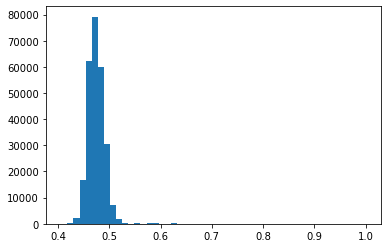

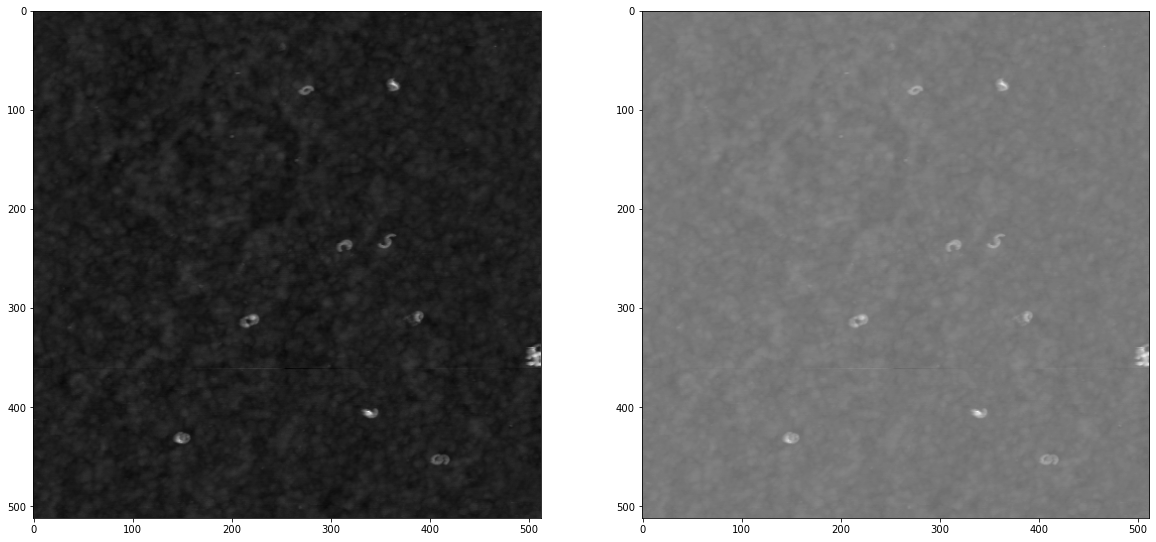

array([[[0.49148813],
        [0.48760286],
        [0.47992423],
        ...,
        [0.49737415],
        [0.49737415],
        [0.49737415]],

       [[0.48567173],
        [0.47613037],
        [0.47236657],
        ...,
        [0.49935177],
        [0.5073412 ],
        [0.5073412 ]],

       [[0.48954162],
        [0.47802356],
        [0.48183247],
        ...,
        [0.50333065],
        [0.50333065],
        [0.50533193]],

       ...,

       [[0.48374832],
        [0.48183247],
        [0.47236657],
        ...,
        [0.49148813],
        [0.49737415],
        [0.49935177]],

       [[0.47802356],
        [0.47424474],
        [0.47236657],
        ...,
        [0.49737415],
        [0.5073412 ],
        [0.50533193]],

       [[0.47802356],
        [0.47424474],
        [0.46677646],
        ...,
        [0.49737415],
        [0.5073412 ],
        [0.5073412 ]]], dtype=float32)

In [126]:
de_noise('hirs_7cell_20190912_1_000.tif',method='exp')

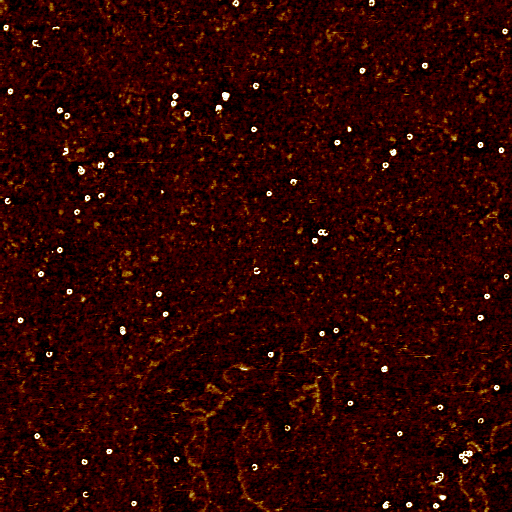

In [116]:
PIL.Image.open('example2.tif')